Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

Reading Dataset

In [2]:
bike_df=pd.read_csv('day.csv')

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Shape of the dataset

In [4]:
bike_df.shape

(730, 16)

Checking Null Values

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

proceeding cnt as a target variable

In [7]:
bike_df.size

11680

Identifying the data types

In [8]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Numerical data analysis 

In [9]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
bike_df.ndim

2

In [11]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Cleaning Data

## Drop columns that are not useful

instant is just a row identifier

dteday is also not required because we have mnth and year and weekday columns to describe the date and also we are not performing day to day analysis 

casual and registered columns combinely implies target column

In [12]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bike_df['days_old'] = (pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [13]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


### Now Dropping the columns

In [14]:
bike_df.drop(['instant'], axis = 1, inplace = True)

In [15]:
bike_df.drop(['dteday'], axis = 1, inplace = True)

In [16]:
bike_df.drop(['casual'], axis = 1, inplace = True)

In [17]:
bike_df.drop(['registered'], axis = 1, inplace = True)

In [18]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [19]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [20]:
bike_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [21]:
bike_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

### Handling Missing Values

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [23]:
### There are no missing values

### Handling Outliers

In [24]:
bike_df.nunique

<bound method DataFrame.nunique of      season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  wind

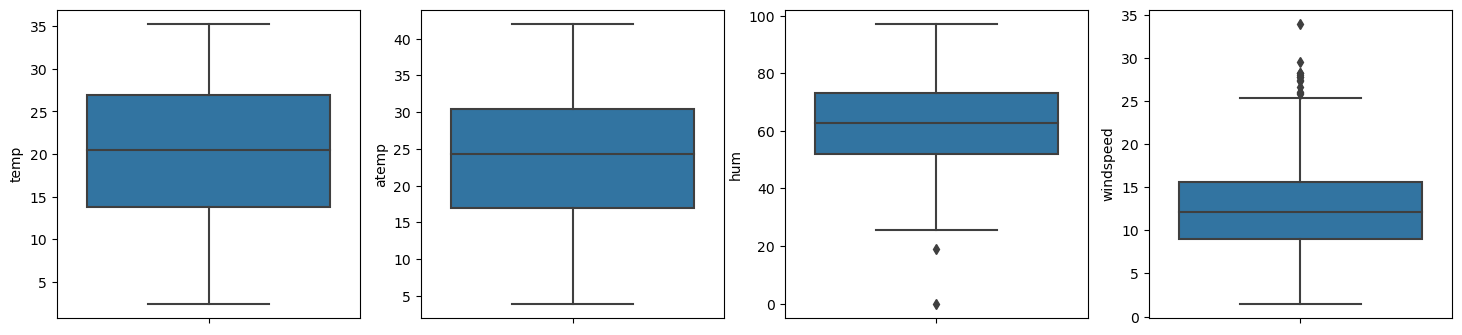

In [25]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

There are no outliers to be handeled

# EDA

Convert season and weathersit to categorical types

In [26]:
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


Pair plots

<Figure size 1500x3000 with 0 Axes>

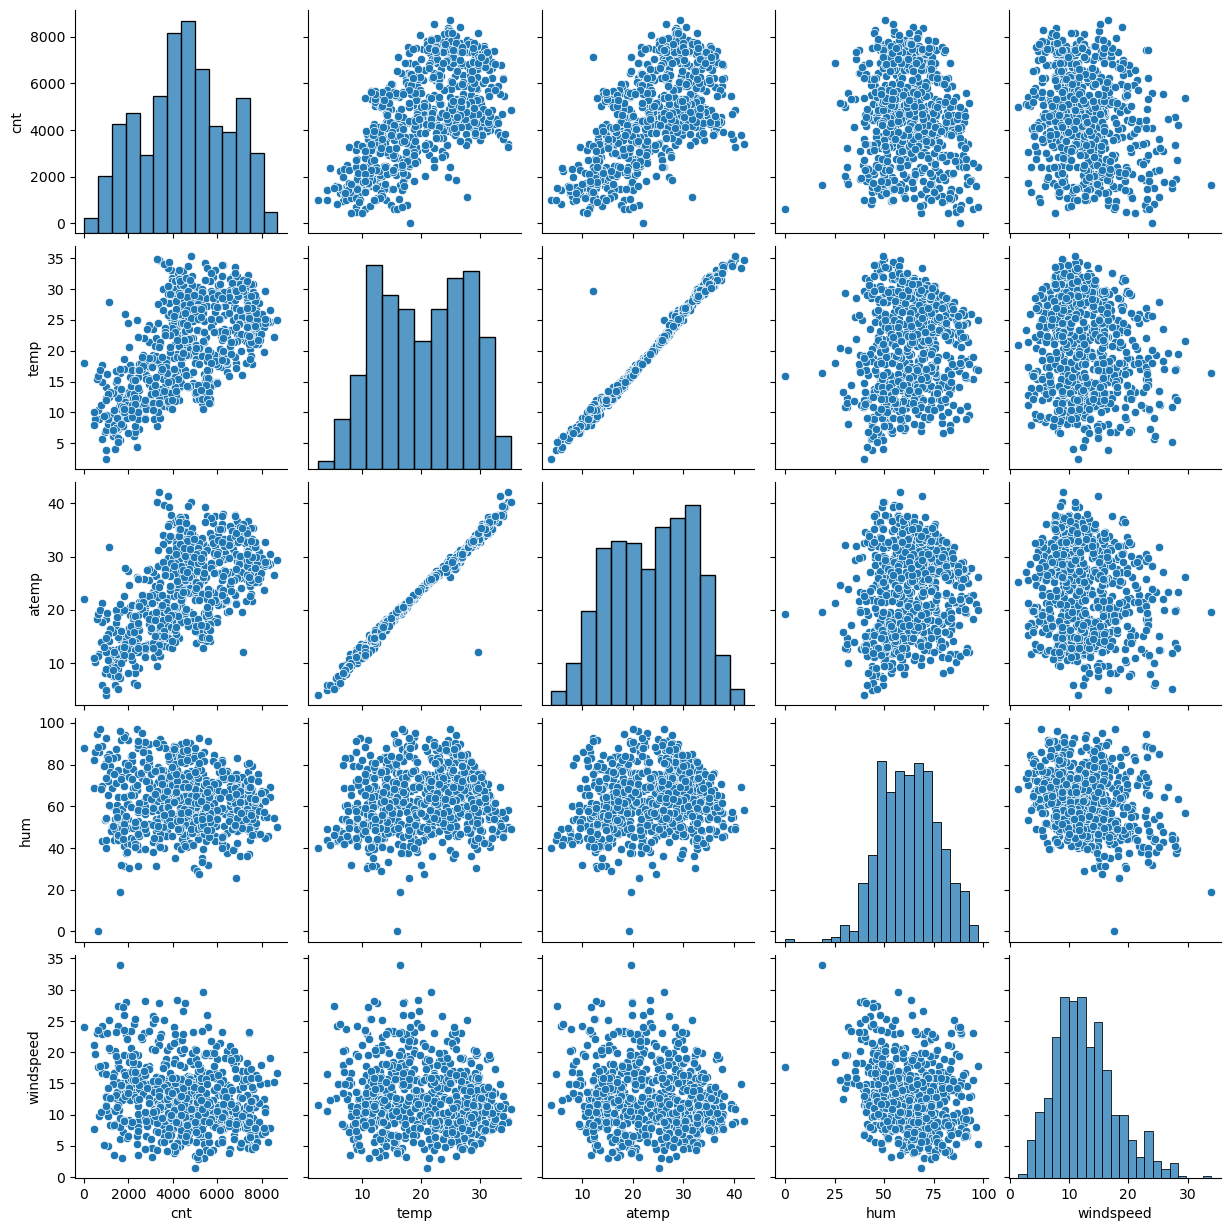

In [27]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

## Inference:

temp and atemp are correlated with the target variable cnt and also temp and atemp are highly correlated with each other

In [28]:
### Visualizing the pair plots with numerical variables

<Figure size 1500x3000 with 0 Axes>

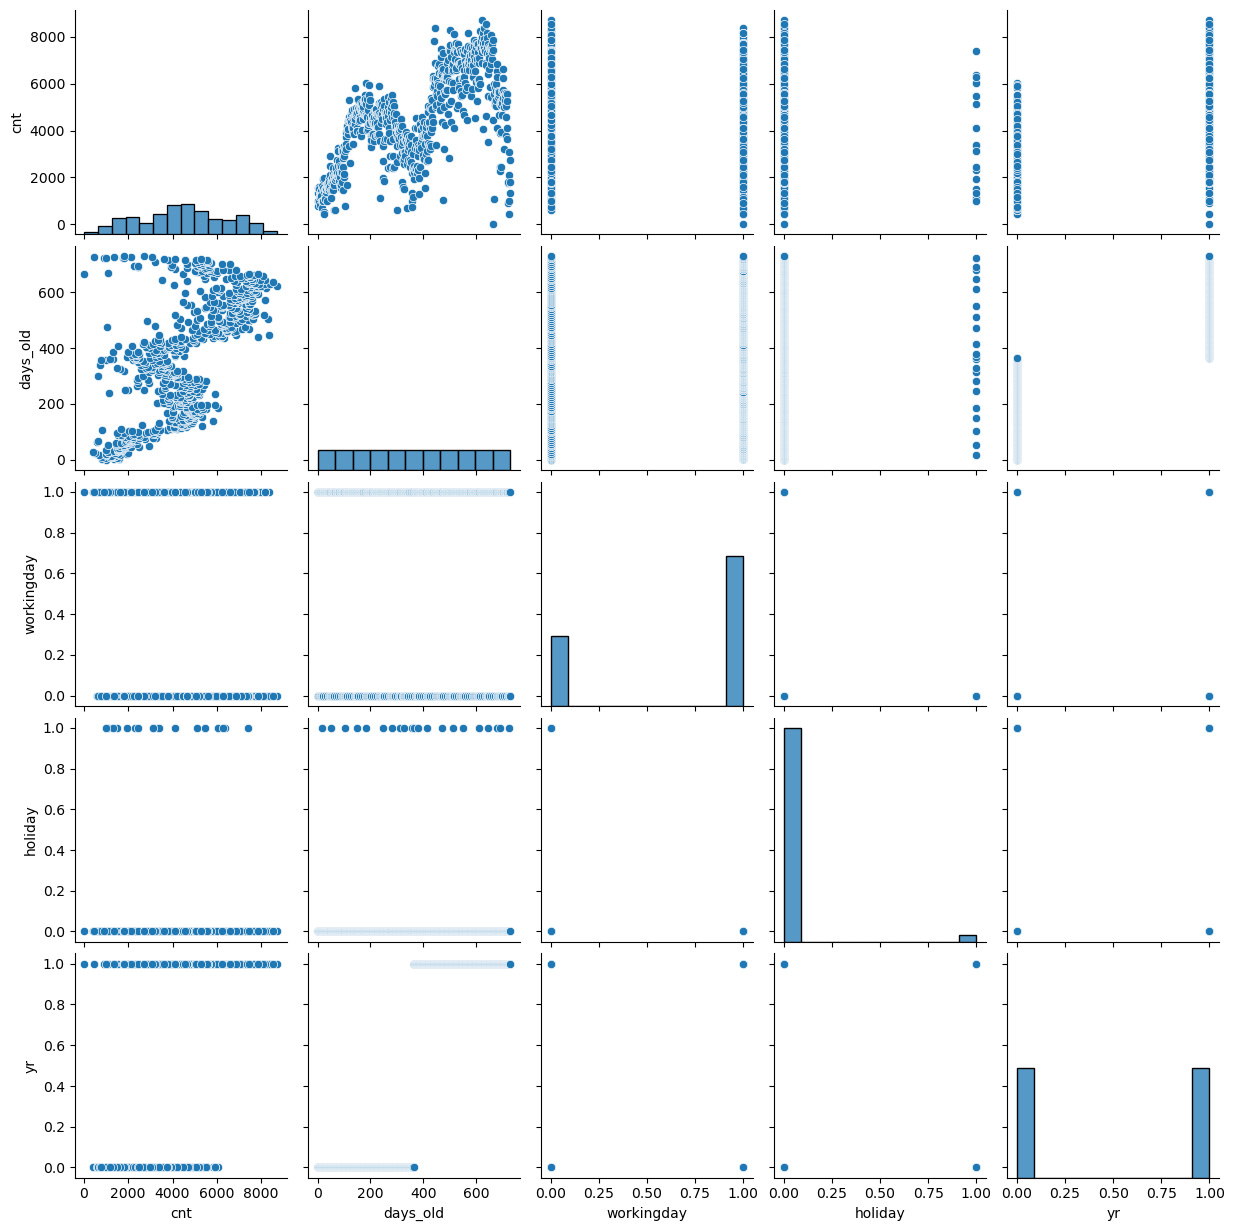

In [29]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'days_old', 'workingday', 'holiday','yr'])
plt.show()

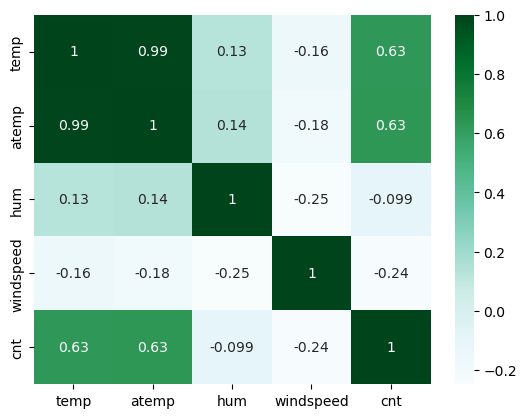

In [30]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [31]:
bike_df.corr

<bound method DataFrame.corr of      season  yr mnth  holiday weekday  workingday weathersit       temp  \
0    spring   0  jan        0     sat           0   moderate  14.110847   
1    spring   0  jan        0     sun           0   moderate  14.902598   
2    spring   0  jan        0     mon           1       good   8.050924   
3    spring   0  jan        0     tue           1       good   8.200000   
4    spring   0  jan        0     wed           1       good   9.305237   
..      ...  ..  ...      ...     ...         ...        ...        ...   
725  spring   1  dec        0     thu           1   moderate  10.420847   
726  spring   1  dec        0     fri           1   moderate  10.386653   
727  spring   1  dec        0     sat           0   moderate  10.386653   
728  spring   1  dec        0     sun           0       good  10.489153   
729  spring   1  dec        0     mon           1   moderate   8.849153   

        atemp      hum  windspeed   cnt  days_old  
0    18.18125  

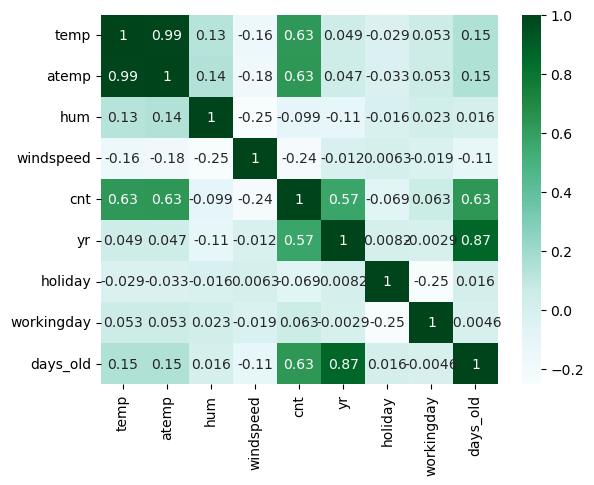

In [32]:
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt','yr','holiday','workingday','days_old']].corr(), cmap='BuGn', annot = True)
plt.show()

#### From the correlation map, temp, atemp and days_old seems to be highly correlated and only those variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
#### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

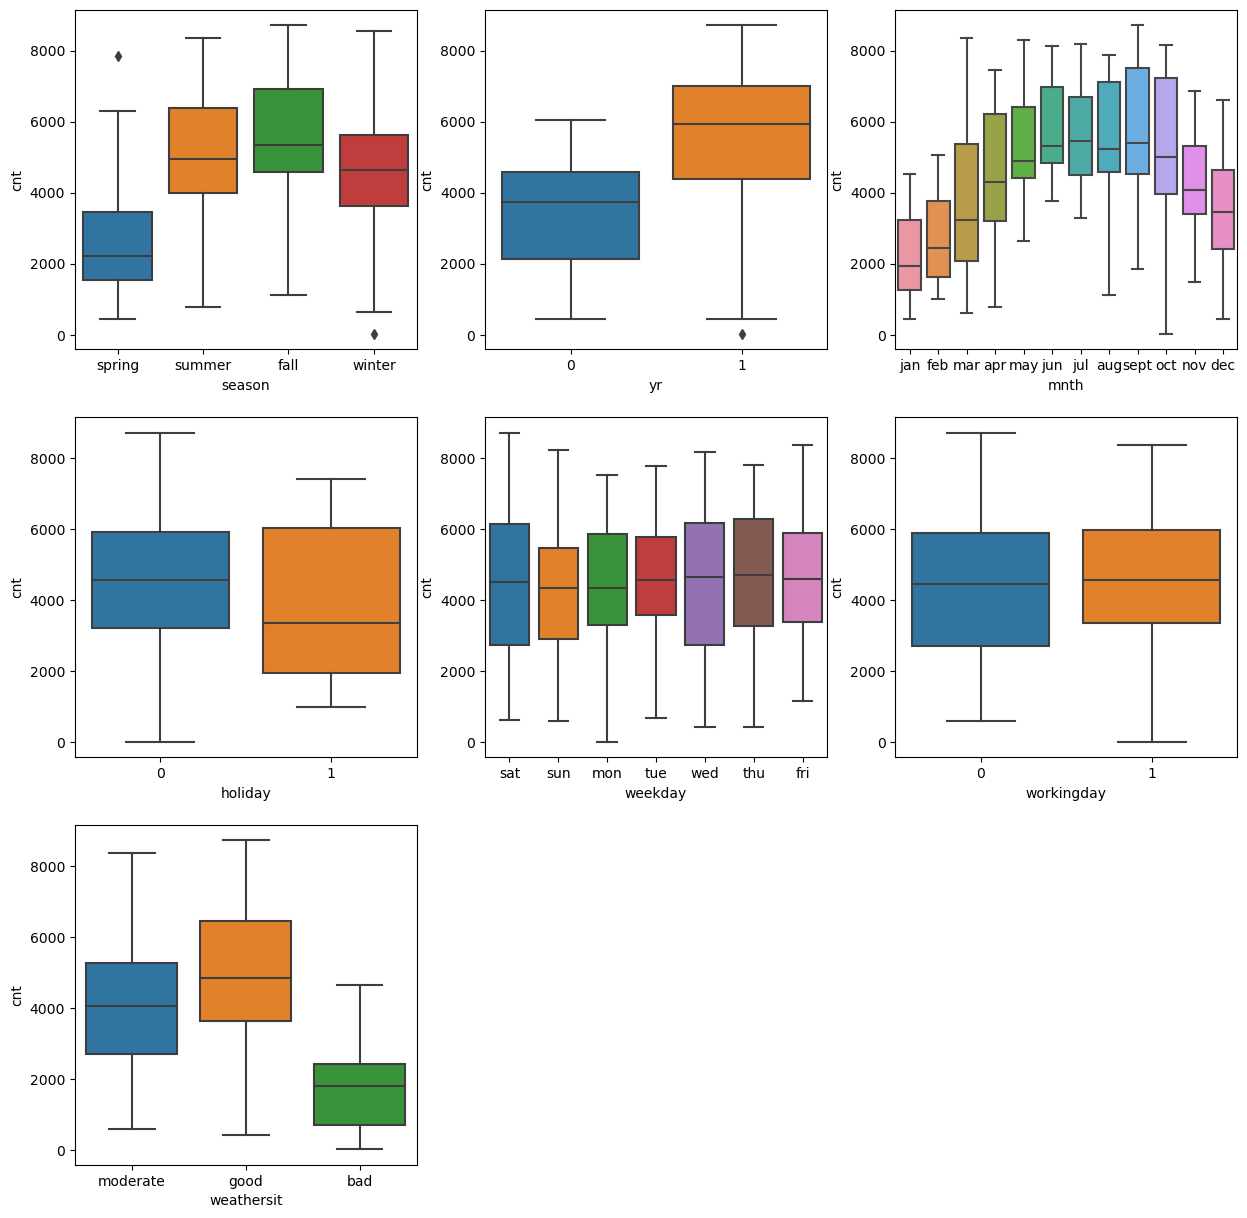

In [33]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

### Inference
1. there is more growth in 2019 compared to 2018
2. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
3. Fall season has hight demand compared to other seasons

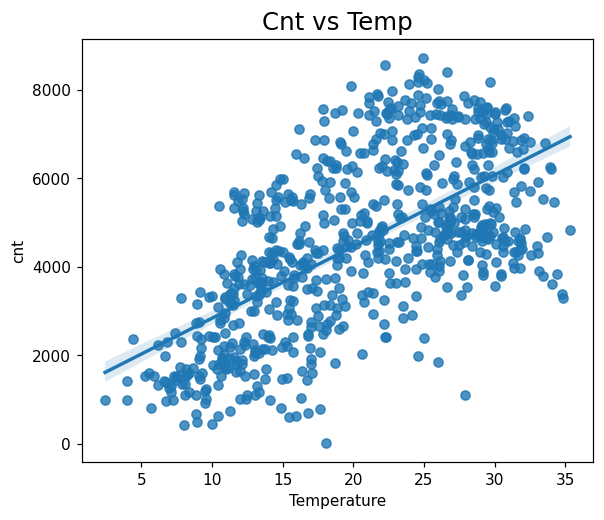

In [34]:
## Best fit line for temp and the target variable
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### there is increase in bike demand linearly 
#### Positively correlated

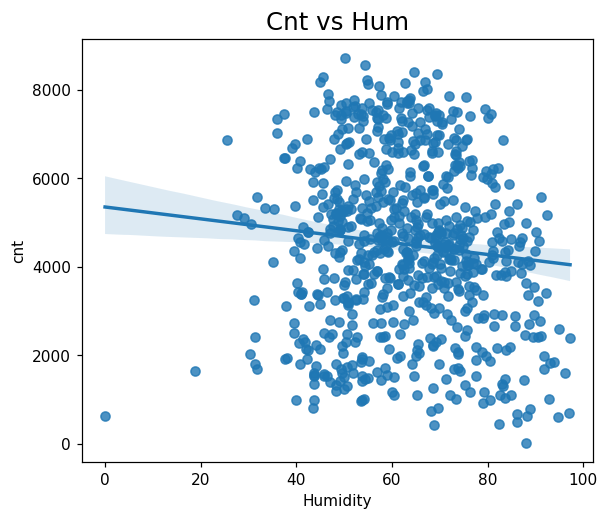

In [35]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### there is no much correlation with humidity

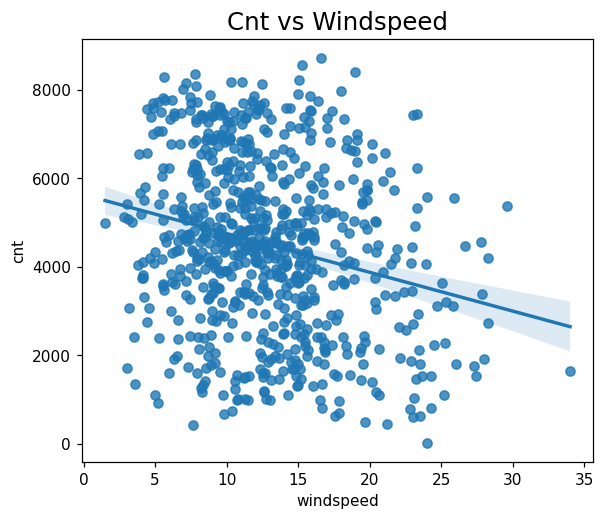

In [36]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="windspeed")
plt.show()

#### Inference:
- Windspeed values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

In [37]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# Data Preparation for Linear Regression 

#### 5.1 Create dummy variables for all categorical variables

In [38]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [39]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [40]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,True,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,True,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,True,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,True,...,False,False,False,False,False,False,True,False,True,False


# Model Building using RFE and Automated approach

In [41]:
# Split Data into training and test

In [42]:
#y to contain only target variable
y=bike_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,True,False,...,False,False,False,False,False,False,True,False,True,False


In [44]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### Feature Scaling continuous variables

In [45]:
#Following columns are continous to be scaled temp,hum,windspeed

In [46]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [48]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,False,False,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,False,False,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,False,True,...,False,True,False,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,True,False,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,False,False,...,False,False,False,False,False,False,True,False,False,True


#### Use RFE to eliminate some columns

In [50]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [52]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 10),
 ('mnth_jan', False, 9),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 8),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

## Manual elimination

In [53]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

In [54]:
# function to calculate VIFs

In [55]:
def get_vif(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    df1 = X_train_sm[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.astype(float).values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF', ascending=False))

In [56]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [57]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [58]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [59]:
X_train_rfe.shape

(511, 15)

# Build Model

### Model 1 constitutes all variable selected by rfe

In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [61]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
        'weathersit_bad', 'weathersit_moderate']

# Run the model and VIF calculations
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          4.52e-183
Time:                        14:14:04   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

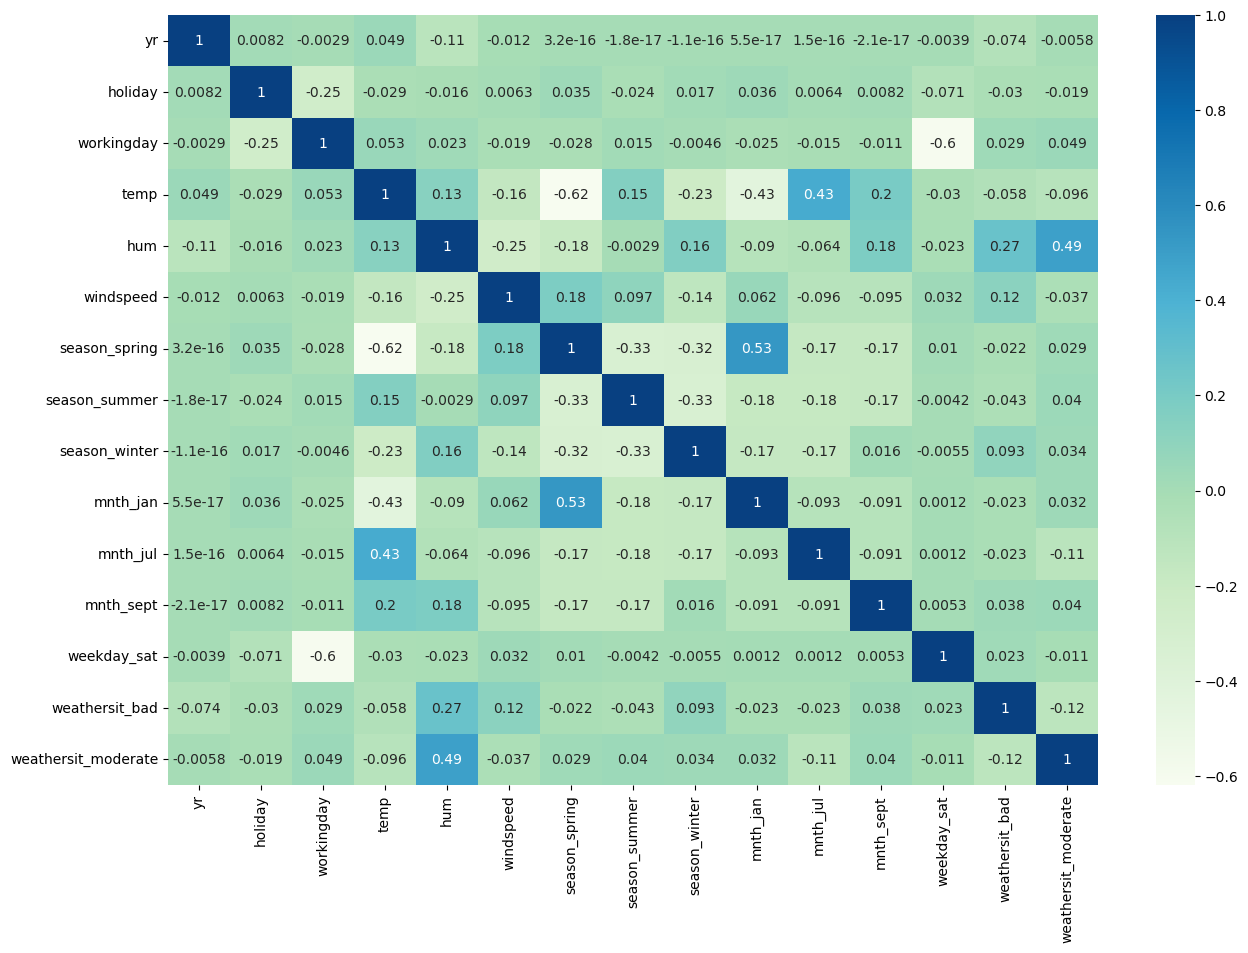

In [65]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate',]].corr(), cmap='GnBu', annot=True)
plt.show()

In [66]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,True,False,...,False,False,False,False,False,False,True,False,True,False


In [69]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [70]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.59e-184
Time:                        14:19:24   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

## Model 3

In [71]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.46e-181
Time:                        14:20:03   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

### Model 4

In [73]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          4.56e-182
Time:                        14:20:33   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

### Model 5

In [75]:
# Dropping the variable mnth_jul, temp as it has negative coefficient and is insignificant as it has high p-value

cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.84e-150
Time:                        14:21:37   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

### Model 6

In [76]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           3.93e-97
Time:                        14:22:18   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

### Model 7

In [77]:
# Removing windspeed with spring as windspeed was highly correlated with temp

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          5.90e-146
Time:                        14:26:56   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

### Model 8

In [78]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          6.32e-145
Time:                        14:27:31   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

### Model 9


In [79]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.33e-179
Time:                        14:28:42   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

#### `_Inference`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821 
Let us select Model 9 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [81]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [82]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436202 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


### Model Evaluation

In [83]:
y_train_pred = lr.predict(X_train[cols])

In [84]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

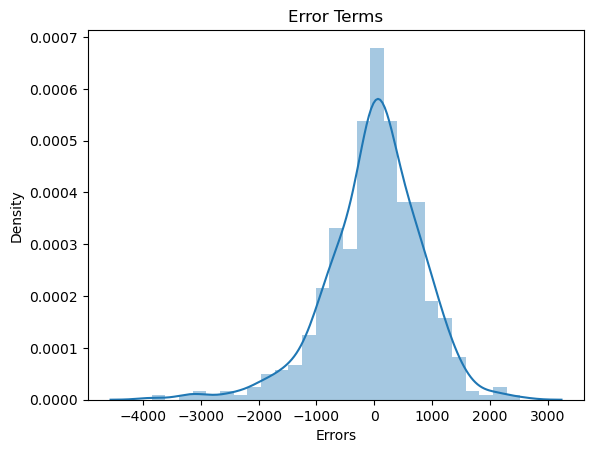

In [85]:
plot_res_dist(y_train, y_train_pred)

In [86]:
# Errors are normally distribured here with mean 0. So everything seems to be fine

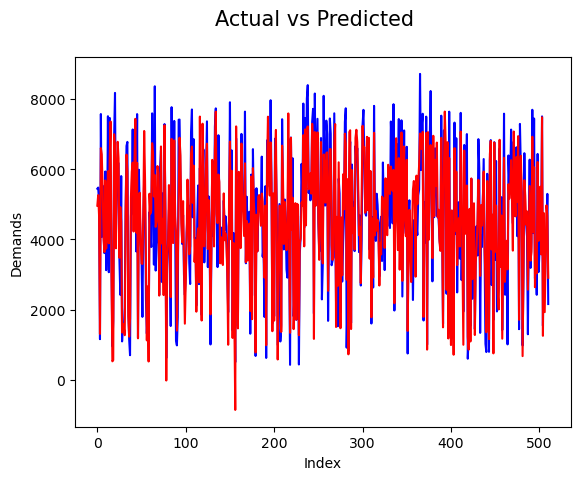

In [87]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

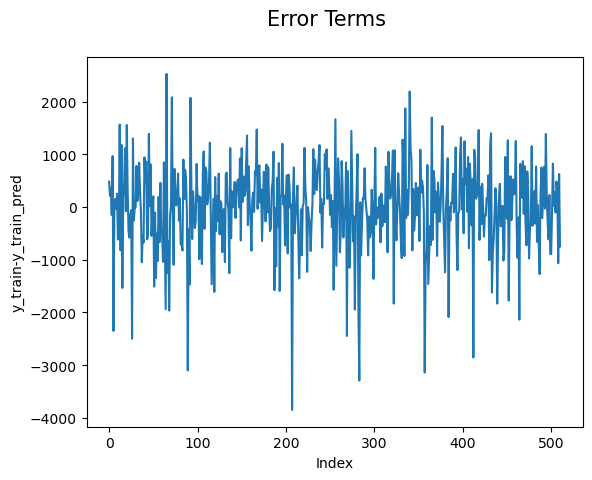

In [88]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [90]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

In [91]:
#same score obtained from final model

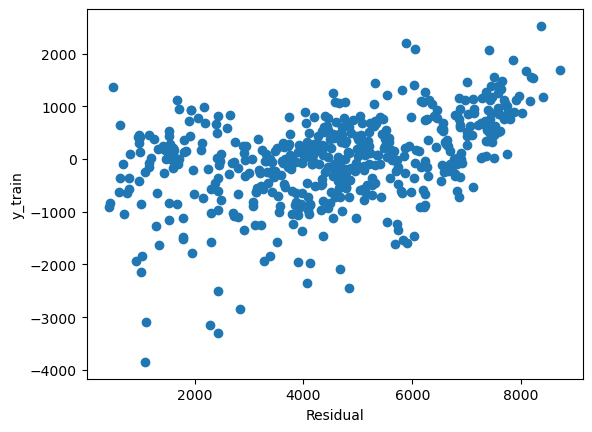

In [92]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [93]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [94]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [95]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393238

- R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

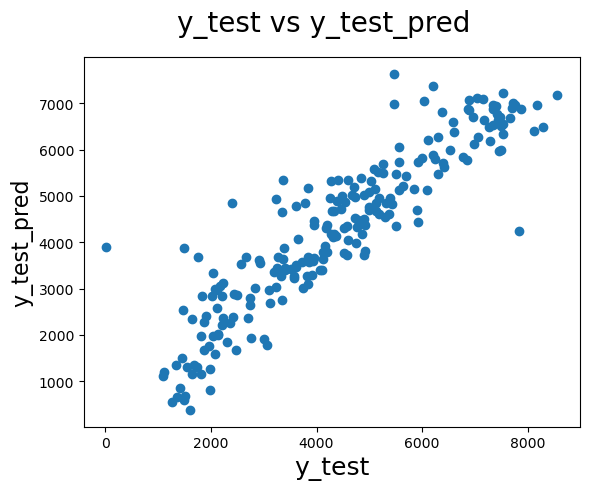

In [96]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### error term doesnt vary much

In [97]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)       

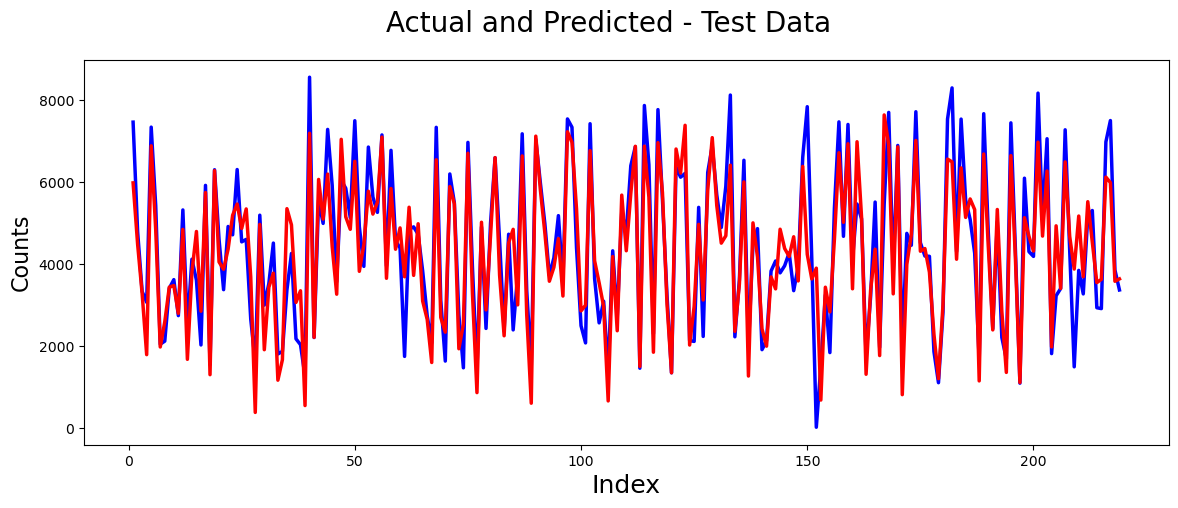

In [98]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

predictions of test data is very close to actuals

### Plot Error terms for test data

In [99]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

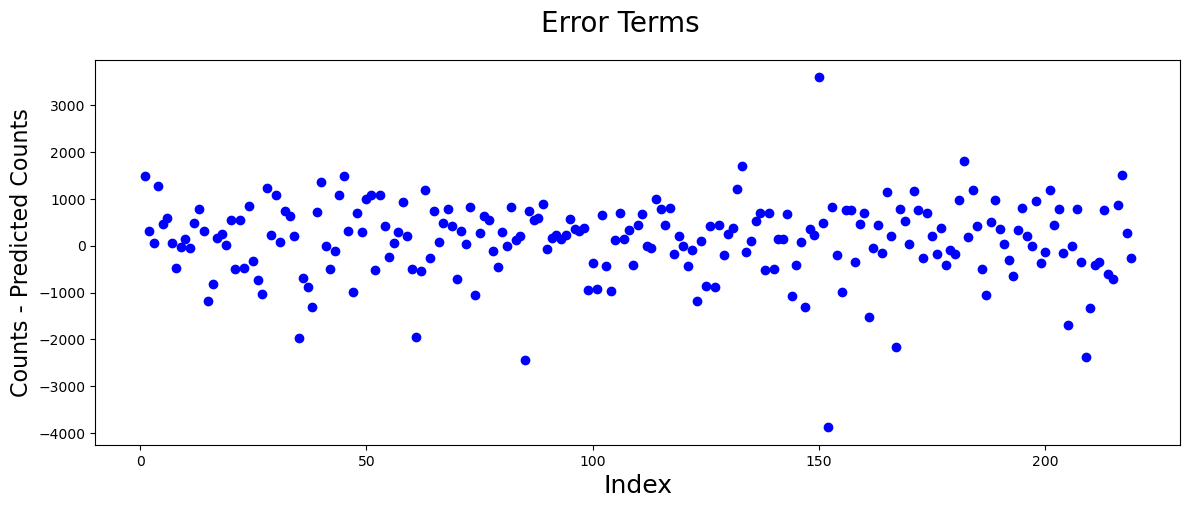

In [100]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

- As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# Model Interpretation

In [101]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.33e-179
Time:                        14:54:08   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### Interpretation of Results
### Analyzing the above model, the company should focus on the following features:
`Spring Expansion`: The company should focus on expanding its business during the spring season.
`September Promotion`: The company should increase its promotional efforts in September, as it is expected to be a peak month for business.
`Post-Normalization Boom`: Based on previous data, a significant increase in the number of users is expected once conditions return to normal, compared to 2019.
`Maintenance During Low Demand`: There will be fewer bookings during light snow or rain. The company could use this period to service the bikes without affecting business.
Hence, when the situation normalizes, the company should introduce new offers during the pleasant spring season and ramp up advertising efforts in September, the peak business month.

### Conclusion

Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)